In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

doc = pd.read_csv('doc.csv')
face = pd.read_csv('face.csv')

print ("Face shape: ",face.shape)
print ("Doc shape: ", doc.shape)

face_doc_merge = pd.merge(face, doc, on=['Unnamed: 0','user_id'], suffixes=['_face','_doc'])
print ("Merge shape:",face_doc_merge.shape)
face_doc_merge.head()

Face shape:  (5880, 9)
Doc shape:  (5880, 19)
Merge shape: (5880, 26)


,Unnamed: 0,user_id,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,sub_result
0,58,ecee468d4a124a8eafeec61271cd0da1,clear,clear,2017-06-20 17:50:43,clear,clear,{},9e4277fc1ddf4a059da3dd2db35f6c76,clear,clear,clear,clear,clear,2017-06-20 17:50:43,clear,NaN,NaN,clear,NaN,NaN,9e4277fc1ddf4a059da3dd2db35f6c76,NaN,NaN,"{'document_type': 'driving_licence', 'date_of_...",clear
1,76,1895d2b1782740bb8503b9bf3edf1ead,clear,clear,2017-06-20 13:28:00,clear,clear,{},ab259d3cb33b4711b0a5174e4de1d72c,clear,clear,clear,clear,clear,2017-06-20 13:28:00,clear,NaN,NaN,clear,NaN,NaN,ab259d3cb33b4711b0a5174e4de1d72c,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,217,e71b27ea145249878b10f5b3f1fb4317,clear,clear,2017-06-18 21:18:31,clear,clear,{},2b7f1c6f3fc5416286d9f1c97b15e8f9,clear,clear,clear,clear,clear,2017-06-18 21:18:31,clear,NaN,NaN,clear,clear,NaN,2b7f1c6f3fc5416286d9f1c97b15e8f9,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,221,f512dc74bd1b4c109d9bd2981518a9f8,clear,clear,2017-06-18 22:17:29,clear,clear,{},ab5989375b514968b2ff2b21095ed1ef,clear,clear,clear,clear,clear,2017-06-18 22:17:29,clear,NaN,NaN,clear,NaN,NaN,ab5989375b514968b2ff2b21095ed1ef,NaN,NaN,"{'document_type': 'driving_licence', 'date_of_...",clear
4,251,0685c7945d1349b7a954e1a0869bae4b,clear,clear,2017-06-18 19:54:21,clear,clear,{},dd1b0b2dbe234f4cb747cc054de2fdd3,clear,clear,clear,clear,clear,2017-06-18 19:54:21,clear,NaN,NaN,clear,NaN,NaN,dd1b0b2dbe234f4cb747cc054de2fdd3,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Document scan results by gender across all months: 


Date           result_doc  gender
2017 05 (May)  clear       Female     19
                           Male       28
               consider    Female      1
                           Male        1
2017 06 (Jun)  clear       Female     79
                           Male      146
               consider    Female      3
                           Male        4
2017 07 (Jul)  clear       Female    268
                           Male      552
               consider    Female      4
                           Male       15
2017 08 (Aug)  clear       Female    287
                           Male      543
               consider    Female      6
                           Male       32
2017 09 (Sep)  clear       Female    265
                           Male      447
               consider    Female     37
                           Male       79
2017 10 (Oct)  clear       Female    314
                           Male      539
          

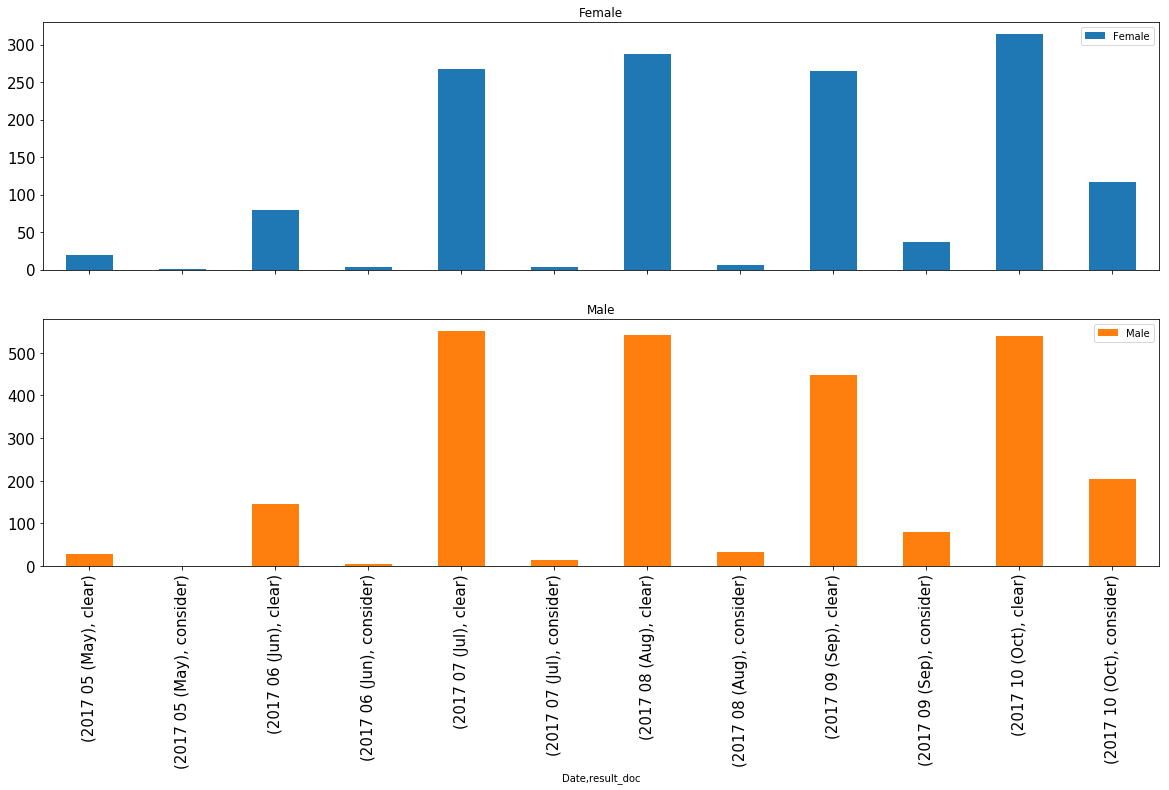


 

Document scan sub results grouped by gender:


Date           sub_result  gender
2017 05 (May)  caution     Female      1
                           Male        1
               clear       Female     19
                           Male       28
2017 06 (Jun)  caution     Female      3
                           Male        2
               clear       Female     79
                           Male      146
               suspected   Male        2
2017 07 (Jul)  caution     Female      3
                           Male       13
               clear       Female    268
                           Male      552
               suspected   Female      1
                           Male        2
2017 08 (Aug)  caution     Female      5
                           Male       22
               clear       Female    287
                           Male      543
               suspected   Female      1
                           Male       10
2017 09 (Sep)  caution     Female     32
             

In [2]:
a = face_doc_merge['properties_doc'].map(eval)
face_doc_new = pd.concat([face_doc_merge.drop(['properties_doc'], axis=1), a.apply(pd.Series)], axis=1)

doc_result_summary = face_doc_new[['user_id','created_at_doc','result_doc','gender']]

doc_result_summary['Date'] = pd.to_datetime(doc_result_summary['created_at_doc'], format='%Y-%m-%d')
doc_result_summary['Date'] = doc_result_summary['Date'].dt.strftime('%Y %m (%b)')

doc_result_summary.head()

face_doc_new['Date'] = pd.to_datetime(face_doc_new['created_at_doc'], format='%Y-%m-%d')
face_doc_new['Date'] = face_doc_new['Date'].dt.strftime('%Y %m (%b)')

doc_result = doc_result_summary.groupby(['Date','result_doc','gender'])['result_doc'].count()
print ("Document scan results by gender across all months: ")
print ('\n')
print (doc_result)

doc_result.unstack().plot(kind='bar', figsize=(20,10), fontsize=15, subplots=True)
plt.show()

print ('\n \n')

doc_sub_result = face_doc_new.groupby(['Date','sub_result','gender'])['sub_result'].count()
print ("Document scan sub results grouped by gender:")
print ('\n')
print (doc_sub_result)

In [3]:
print ('\n','Both face & doc clear :',round (face_doc_new.loc[(face_doc_new.result_face=='clear') & 
                                               (face_doc_new.result_doc=='clear')].shape[0]/face_doc_new.shape[0]*100),'%')

print ('\n','Either face not clear or doc not clear :',round(face_doc_new.loc[((face_doc_new.result_face!='clear') |
                              (face_doc_new.result_doc!='clear'))].shape[0]/face_doc_new.shape[0]*100),'%')
print ('\n', "Facial Similarity Checks:",'\n')
print (face_doc_new.groupby('result_face')['user_id'].count())



 Both face & doc clear : 72 %

 Either face not clear or doc not clear : 28 %

 Facial Similarity Checks: 

result_face
clear       5513
consider     367
Name: user_id, dtype: int64


In [159]:
face_failed=face_doc_new.loc[(face_doc_new['result_face']!='clear')]
face_failed.fillna(value='No Data Available',inplace=True)

face_list = ['face_comparison_result','facial_image_integrity_result','visual_authenticity_result_face']
face_dict ={}
for result in face_list:
    face_result = result.replace("'","")
    face_dict[face_result] = pd.Series(face_failed[result])

    
face_failed_new = pd.DataFrame(face_dict).apply(pd.value_counts).fillna(0)
# pd.DataFrame(face_dict).apply(pd.value_counts).plot(kind='bar', subplots=True, layout=(5,4), figsize=(20,20))



                   face_comparison_result  facial_image_integrity_result  \
No Data Available                   345.0                             19   
clear                                 0.0                             22   
consider                             22.0                            326   

                   visual_authenticity_result_face  
No Data Available                              152  
clear                                          190  
consider                                        25  


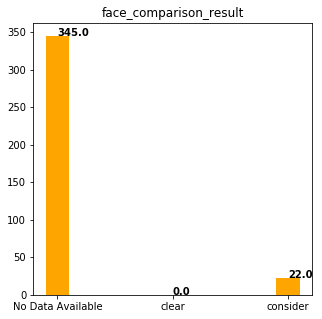

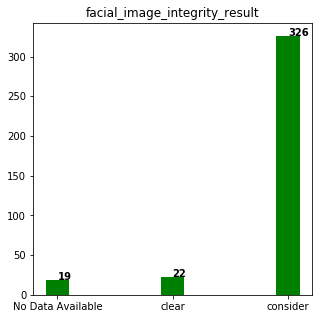

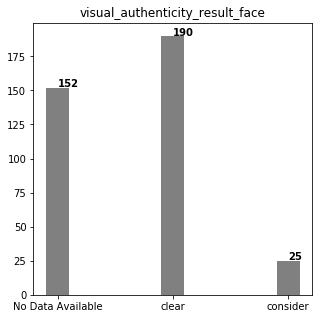

In [160]:
print (face_failed_new)
x = list(face_failed_new.index)
color=['orange', 'green', 'grey']
c=0
for col in face_failed_new.columns:

    y = list(face_failed_new[col])

    fig, ax = plt.subplots()
    width = 0.2 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups

    ax.bar(ind, y, width, color=color[c])
    c+=1
    
    ax.set_xticks(ind)
    ax.set_xticklabels(x)
    plt.title(col)

    
    fig.set_figheight(5)
    fig.set_figwidth(5)

    for i, v in enumerate(y):
        ax.text(i, v+0.35, str(v), fontweight='bold')
        

In [161]:
doc_failed=face_doc_new.loc[(face_doc_new['result_doc']!='clear')]
doc_failed.fillna(value='No Data Available',inplace=True)
print (face_doc_new.groupby('result_doc')['user_id'].count())


result_doc
clear       4406
consider    1474
Name: user_id, dtype: int64


In [162]:
doc_list = ['visual_authenticity_result_doc','image_integrity_result','face_detection_result',
           'image_quality_result','supported_document_result','colour_picture_result','data_validation_result',
           'data_consistency_result','data_comparison_result','police_record_result','compromised_document_result']
doc_dict ={}
for result in doc_list:
    new_result = result.replace("'","")
    doc_dict[new_result] = pd.Series(doc_failed[result])

doc_failed_new = pd.DataFrame(doc_dict).apply(pd.value_counts).fillna(0)
print (doc_failed_new)
# pd.DataFrame(doc_dict).apply(pd.value_counts).plot(kind='bar', subplots=True, layout=(5,4), figsize=(20,20))

                   visual_authenticity_result_doc  image_integrity_result  \
No Data Available                           889.0                     0.0   
clear                                       488.0                   137.0   
consider                                     97.0                  1337.0   
unidentified                                  0.0                     0.0   

                   face_detection_result  image_quality_result  \
No Data Available                  889.0                   0.0   
clear                              562.0                 640.0   
consider                            23.0                   0.0   
unidentified                         0.0                 834.0   

                   supported_document_result  colour_picture_result  \
No Data Available                       11.0                  936.0   
clear                                 1408.0                  536.0   
consider                                 0.0                    2.0   

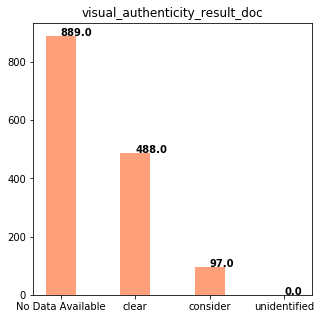

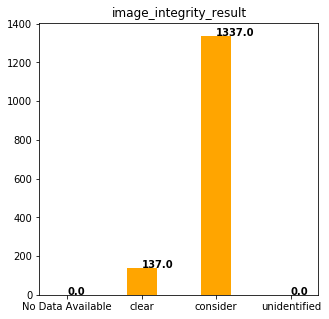

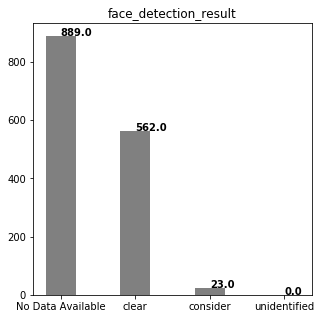

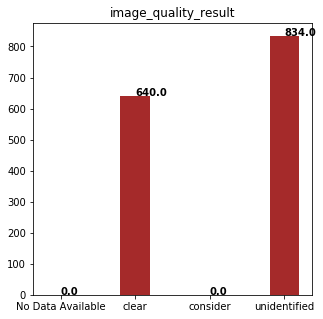

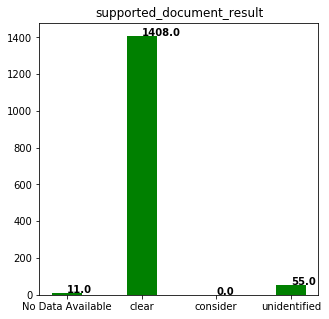

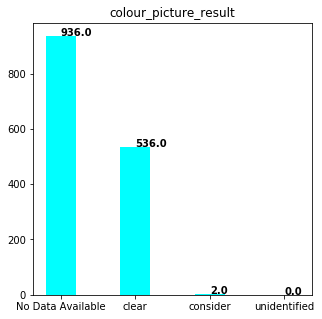

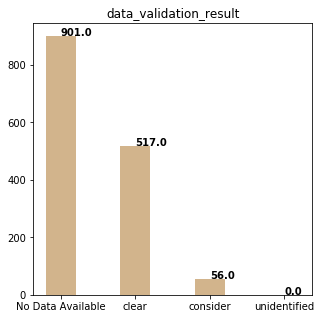

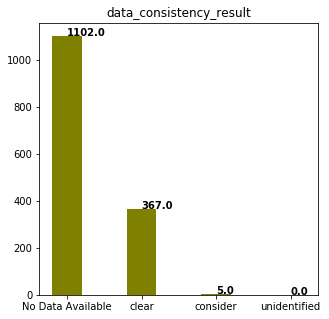

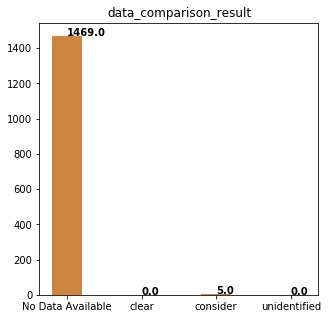

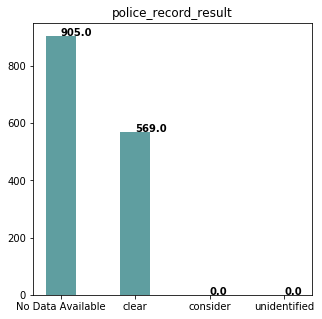

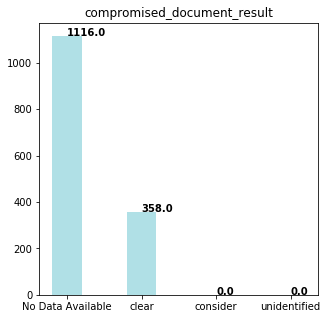

In [163]:
x = list(doc_failed_new.index)
color=['lightsalmon', 'orange', 'grey','brown','green','cyan','tan','olive','peru','cadetblue','powderblue']
c=0
for col in doc_failed_new.columns:

    y = list(doc_failed_new[col])

    fig, ax = plt.subplots()
    width = 0.4 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups

    ax.bar(ind, y, width, color=color[c])
    c+=1
    
    ax.set_xticks(ind)
    ax.set_xticklabels(x)
    plt.title(col)

    
    fig.set_figheight(5)
    fig.set_figwidth(5)

    for i, v in enumerate(y):
        ax.text(i, v, str(v), fontweight='bold')
        

In [15]:
both_face_doc_failed=face_doc_new.loc[(face_doc_new['result_doc']!='clear') & (face_doc_new['result_face']!='clear')]
print ("Total count of records with both facial and document checks fail:",both_face_doc_failed.user_id.count())
print ("Total count of records with both facial and document checks:",face_doc_new.user_id.count())
print ("Total failure rate:",round(both_face_doc_failed.user_id.count()/face_doc_new.user_id.count()*100),'%')


Total count of records with both facial and document checks fail: 195
Total count of records with both facial and document checks: 5880
Total failure rate: 3.0 %


                 Fail: count of user id
created_at_face                        
2017-06-01                            1
2017-07-01                           41
2017-08-01                           51
2017-09-01                           54
2017-10-01                           48


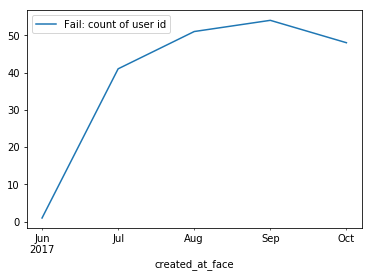

In [143]:
# Fail count due to both facial similiary checks and document checks

ax = both_face_doc_failed[['created_at_face','user_id']]
ax.created_at_face = pd.to_datetime(ax.created_at_face, format='%Y %m')
ax.created_at_face = ax.created_at_face.dt.strftime('%Y %m')

ax_count = pd.DataFrame(ax.groupby('created_at_face')['user_id'].count())


ax_count.reset_index(inplace=True)
ax_count.created_at_face=pd.to_datetime(ax_count.created_at_face, format='%Y/%m')
ax_count.set_index('created_at_face', inplace=True)

ax_count = ax_count.rename(columns={'user_id': 'Fail: count of user id'})
print(ax_count.head())
ax_count.plot()

